# Import Libraries

In [23]:
# Data handling
import pandas as pd
import numpy as np

# Data splitting
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

import time
from memory_profiler import memory_usage



# load data and preproccessing it

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'Gene Expression Cancer RNA-Seq Dataset.csv' 
data = pd.read_csv(file_path)


# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # All rows, all columns except the
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [27]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Preprocessing

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('Gene Expression Cancer RNA-Seq Dataset.csv') 

# Drop the 'id' column and the empty 'Unnamed: 32' column
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode the 'diagnosis' column to numeric values
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Split the data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Exploratory Data Analysis (EDA)

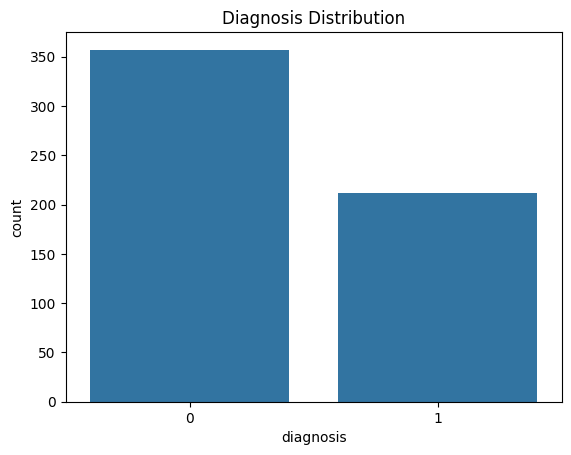

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

In [29]:
# Count plot for diagnosis distribution
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.show()

# Summary statistics for features
print(data.describe())

# Train Random Forest Classifier

In [30]:
# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
rf_predictions = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Train XGBoost Classifier

In [31]:
# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Classifier Evaluation:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Confusion Matrix for Random Forest

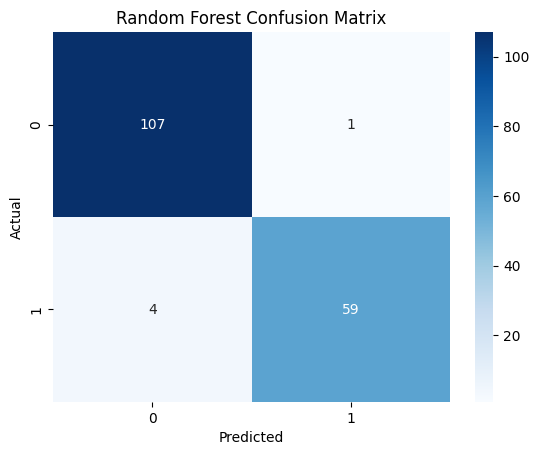

In [32]:
# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost

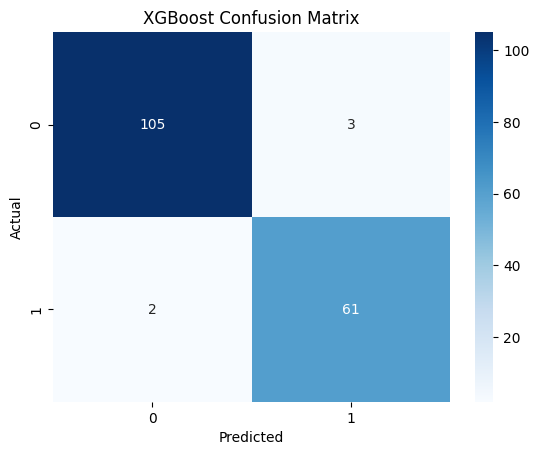

In [33]:
# Confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(xgb_cm, annot=True, fmt='g', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Plot

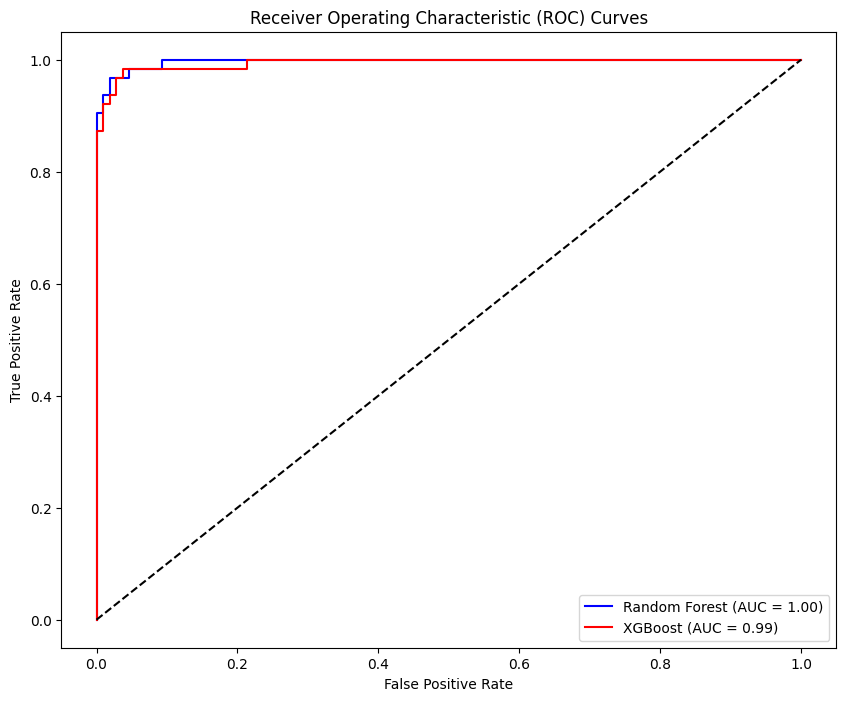

In [34]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name, color):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plot_roc_curve(rf_clf, X_test, y_test, 'Random Forest', 'blue')
plot_roc_curve(xgb_clf, X_test, y_test, 'XGBoost', 'red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

# Hyperparameter Tuning for Random Forest

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              n_jobs=-1, 
                              verbose=2)

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9572468354430379


## Random Forest Time and Memory calculation

In [36]:
# Measure training time and memory usage for Random Forest
start_time = time.time()
mem_usage_rf = memory_usage((grid_search_rf.fit, (X_train, y_train)))
end_time = time.time()

training_time_rf = end_time - start_time
max_memory_usage_rf = max(mem_usage_rf)

print("Random Forest Training Time:", training_time_rf, "seconds")
print("Random Forest Max Memory Usage:", max_memory_usage_rf, "MiB")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Training Time: 24.530802011489868 seconds
Random Forest Max Memory Usage: 225.25390625 MiB


# Hyperparameter Tuning for XGBoost

In [37]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=2)

# Perform grid search
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.9748417721518987


## XGBoost Time and Memory calculation

In [38]:
# Measure training time and memory usage for XGBoost
start_time = time.time()
mem_usage_xgb = memory_usage((grid_search_xgb.fit, (X_train, y_train)))
end_time = time.time()

training_time_xgb = end_time - start_time
max_memory_usage_xgb = max(mem_usage_xgb)

print("XGBoost Training Time:", training_time_xgb, "seconds")
print("XGBoost Max Memory Usage:", max_memory_usage_xgb, "MiB")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost Training Time: 17.4979305267334 seconds
XGBoost Max Memory Usage: 228.5234375 MiB


# Cross-Validation for Random Forest

In [29]:
from sklearn.model_selection import cross_val_score

# Best Random Forest estimator
best_rf_clf = grid_search_rf.best_estimator_

# Perform cross-validation
cv_scores_rf = cross_val_score(best_rf_clf, X, y, cv=5)

# Cross-validation scores
print("Random Forest - Cross-Validation scores:", cv_scores_rf)


Random Forest - Cross-Validation scores: [0.92982456 0.93859649 0.98245614 0.97368421 0.97345133]


# Cross-Validation for XGBoost

In [30]:
# Best XGBoost estimator
best_xgb_clf = grid_search_xgb.best_estimator_

# Perform cross-validation
cv_scores_xgb = cross_val_score(best_xgb_clf, X, y, cv=5)

# Cross-validation scores
print("XGBoost - Cross-Validation scores:", cv_scores_xgb)


XGBoost - Cross-Validation scores: [0.94736842 0.96491228 1.         0.95614035 0.96460177]
